In [215]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [216]:
import re
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime      # datatime 라이브러리 임포트
import calendar
from matplotlib import pyplot as plt
%matplotlib inline

data = pd.read_csv('/content/drive/MyDrive/aiffel/netflix_titles.csv')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [217]:
df = pd.DataFrame(data)
df.drop(['show_id','director'],axis=1)

,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...
8802,Movie,Zodiac,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,TV Show,Zombie Dumb,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,Movie,Zombieland,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,Movie,Zoom,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


**타입 : TV Show**

In [218]:
dataFilter_TV = df['type'] == 'TV Show'
df[dataFilter_TV]

df_TV = df[dataFilter_TV]
df_TV.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


In [219]:
df_TV.isnull().sum()

show_id            0
type               0
title              0
director        2446
cast             350
country          391
date_added        10
release_year       0
rating             2
duration           0
listed_in          0
description        0
dtype: int64

In [220]:
df_TV['country'].fillna("America",inplace =True,limit =79)
df_TV['country'].fillna("Africa",inplace =True,limit =78)
df_TV['country'].fillna("Asia",inplace =True,limit =78)
df_TV['country'].fillna("Europe",inplace =True,limit =78)
df_TV['country'].fillna("Oceania",inplace =True,limit =78)

In [221]:
df_TV.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",America,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,America,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",America,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


In [222]:
a1=df_TV[(df_TV['country'].str.count(','))!=0]

In [223]:
a1.shape

(245, 12)

In [224]:
a1[0:49]['country']='America'
a1[49:98]['country']='Africa'
a1[98:147]['country']='Asia'
a1[147:196]['country']='Europe'
a1[196:]['country']='Oceania'

In [225]:
import plotly.express as px 

In [226]:
z1 = a1.groupby(['country']).size().reset_index(name='counts')
pieChart = px.pie(z1, values='counts', names='country',
title='Distribution of TV Show_null Country on Netflix')
pieChart.show()

In [227]:
df_TV.update(a1, overwrite=True)

In [228]:
def category_continent(x) :
  if x == ('Senegal')or x== ('South Africa')or x== ('Nigeria ')or x== ('Africa') :
    return 0
  elif x == ('Chile')or x== ('Argentina')or x== ('Colombia')or x== ('Brazil')or x== ('Mexico')or x== ('Canada')or x== ('America')or x== ('United States'):
    return 1
  elif x == ('United Arab Emirates')or x== ('Cyprus')or x== ('Philippines')or x== ('Kuwait')or x== ('Jordan')or x== ('Indonesia')or x== ('Saudi Arabia')or x== ('Hong Kong')or x== ('Pakistan')or x== ('Malaysia')or x== ('Lebanon')or x== ('Israel')or x== ('Russia')or x== ('Egypt')or x== ('Singapore')or x== ('Thailand')or x== ('Turkey')or x== ('China')or x== ('India')or x== ('Taiwan')or x== ('Asia')or x== ('South Korea')or x== ('Japan'):
    return 2
  elif x == ('Switzerland')or x== ('Luxembourg')or x== ('Finland')or x== ('Croatia')or x== ('Belarus')or x== ('Ukraine')or x== ('Netherlands')or x== ('Ireland')or x== ('Iceland')or x== ('Norway')or x== ('Poland')or x== ('Belgium')or x== ('Sweden')or x== ('Denmark')or x== ('Italy')or x== ('Germany')or x== ('France')or x== ('Spain')or x== ('Europe')or x== ('United Kingdom'):
    return 3
  else :
    return 4

In [229]:
df_TV['Continent'] = df_TV['country'].apply(category_continent)

In [230]:

df_TV.drop(['country'],axis=1)

,show_id,type,title,director,cast,date_added,release_year,rating,duration,listed_in,description,Continent
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...","September 24, 2021",2021.0,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...","September 24, 2021",2021.0,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,"September 24, 2021",2021.0,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...","September 24, 2021",2021.0,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...","September 24, 2021",2021.0,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,NaN,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","May 1, 2018",2015.0,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...,4
8796,s8797,TV Show,Yunus Emre,NaN,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...","January 17, 2017",2016.0,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves...",2
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","September 13, 2018",2016.0,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...,4
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...","December 15, 2016",2012.0,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre...",2


In [231]:
df_TV.loc[(df_TV.rating=='TV-14'),'rating'] = 14
df_TV.loc[(df_TV.rating=='TV-MA'),'rating'] = 19
df_TV.loc[(df_TV.rating=='TV-PG'),'rating'] = 0
df_TV.loc[(df_TV.rating=='TV-Y'),'rating'] = 0
df_TV.loc[(df_TV.rating=='TV-Y7'),'rating'] = 0
df_TV.loc[(df_TV.rating=='TV-G'),'rating'] = 0
df_TV.loc[(df_TV.rating=='NR'),'rating'] = 0
df_TV.loc[(df_TV.rating=='TV-Y7-FV'),'rating'] = 0
df_TV.loc[(df_TV.rating=='R'),'rating'] = 0

In [232]:
df1=df_TV[['rating','Continent']]
df1=df1.rename(columns={"Continent": "Continent"})
df2=df1.groupby(['Continent','rating']).size().reset_index(name='count')
fig3 = px.line(df2, x="Continent", y="count", color='rating',title='Trend of TV_Show rating produced over the continent on Netflix')
fig3.show()

In [233]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

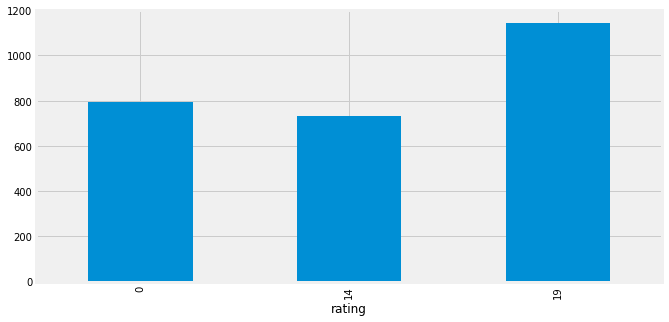

In [234]:
df_TV.groupby('rating')['Continent'].count().plot(kind='bar', figsize=(10,5))
plt.show()

In [235]:
df_TV.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Continent
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021.0,19,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",America,"September 24, 2021",2021.0,19,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,America,"September 24, 2021",2021.0,19,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021.0,19,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",America,"September 24, 2021",2021.0,19,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,1


In [236]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [237]:
import numpy as np

x = np.arange(0, 10, 0.1)
y = np.sin(x)
z = np.cos(x)
ax.plot(x, y, z)

In [238]:
ax.scatter(x, y, z, color = 'r', alpha = 0.5)
ax.scatter(x, y, z, color = 'r', alpha = 0.5)
ax.scatter(x, z, y, color = 'g', alpha = 0.5)

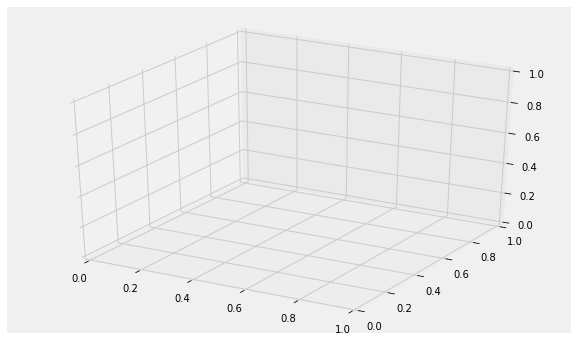

In [239]:
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')

**텔레비전 방송 프로그램의 시청등급**

- TV-14 : 14세 이상의 청소년들을 위한 프로그램

- TV-MA : 17세 이하의 어린이나 청소년들에게 맞지 않는 프로그램

- TV-PG : 부모가 정확히 내용을 알고 보여주라는 프로그램

- TV-Y : 모든 어린이의 시청이 가능한 프로그램

- TV-Y7 : 7세 이상의 어린이들을 대상으로 한 프로그램

- TV-G : 모든 연령층이 볼 수 있는 프로그램

___

**타입 : Movie**

In [240]:
dataFilter_Movie = df['type'] == 'Movie'
df[dataFilter_Movie]

df_Movie = df[dataFilter_Movie]
df_Movie.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


In [241]:
df_Movie.isnull().sum()

show_id           0
type              0
title             0
director        188
cast            475
country         440
date_added        0
release_year      0
rating            2
duration          3
listed_in         0
description       0
dtype: int64

In [242]:
df_Movie['country'].fillna("America",inplace =True,limit =88)
df_Movie['country'].fillna("Africa",inplace =True,limit =88)
df_Movie['country'].fillna("Asia",inplace =True,limit =88)
df_Movie['country'].fillna("Europe",inplace =True,limit =88)
df_Movie['country'].fillna("Oceania",inplace =True,limit =88)

In [243]:
a2=df_Movie[(df_Movie['country'].str.count(','))!=0]

In [244]:
a2.shape

(1075, 12)

In [245]:
a2[0:215]['country']='America'
a2[215:430]['country']='Africa'
a2[430:645]['country']='Asia'
a2[645:860]['country']='Europe'
a2[860:]['country']='Oceania'

In [246]:
z2 = a2.groupby(['country']).size().reset_index(name='counts')
pieChart = px.pie(z2, values='counts', names='country',
title='Distribution of Movie_null Country on Netflix')
pieChart.show()

In [247]:
df_Movie.update(a2, overwrite=True)

In [248]:
df_Movie['Continent'] = df_Movie['country'].apply(category_continent)

In [249]:
df_Movie.drop(['country'],axis=1)

,show_id,type,title,director,cast,date_added,release_year,rating,duration,listed_in,description,Continent
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,"September 25, 2021",2020.0,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",1
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...","September 24, 2021",2021.0,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,1
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","September 24, 2021",1993.0,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",1
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...","September 24, 2021",2021.0,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,1
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","September 23, 2021",2021.0,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","March 9, 2016",2015.0,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,4
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...","November 20, 2019",2007.0,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",1
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...","November 1, 2019",2009.0,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,1
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...","January 11, 2020",2006.0,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",1


In [250]:
df_Movie.loc[(df_Movie.rating=='TV-14'),'rating'] = 14
df_Movie.loc[(df_Movie.rating=='TV-MA'),'rating'] = 19
df_Movie.loc[(df_Movie.rating=='TV-PG'),'rating'] = 0
df_Movie.loc[(df_Movie.rating=='TV-Y'),'rating'] = 0
df_Movie.loc[(df_Movie.rating=='TV-Y7'),'rating'] = 0
df_Movie.loc[(df_Movie.rating=='TV-G'),'rating'] = 0
df_Movie.loc[(df_Movie.rating=='NR'),'rating'] = 19
df_Movie.loc[(df_Movie.rating=='TV-Y7-FV'),'rating'] = 0
df_Movie.loc[(df_Movie.rating=='R'),'rating'] = 19
df_Movie.loc[(df_Movie.rating=='G'),'rating'] = 0
df_Movie.loc[(df_Movie.rating=='PG'),'rating'] = 14
df_Movie.loc[(df_Movie.rating=='PG-13'),'rating'] = 0
df_Movie.loc[(df_Movie.rating=='UR'),'rating'] = 19
df_Movie.loc[(df_Movie.rating=='NC-17'),'rating'] = 19
df_Movie.loc[(df_Movie.rating=='66 min'),'rating'] = 0
df_Movie.loc[(df_Movie.rating=='74 min'),'rating'] = 0
df_Movie.loc[(df_Movie.rating=='84 min'),'rating'] = 0

In [251]:
df3=df_Movie[['rating','Continent']]
df3=df3.rename(columns={"Continent": "Continent"})
df4=df3.groupby(['Continent','rating']).size().reset_index(name='count')
fig5 = px.line(df4, x="Continent", y="count", color='rating',title='Trend of Movie rating produced over the Continent on Netflix')
fig5.show()

**영화의 시청등급**

- G : 모든 연령층의 관객들이 볼 수 있는 영화

- PG : 어린이 청소년들의 시청여부를 판단해야 하는 영화

- PG-13 : 13세 이상의 청소년들이 볼 수 있는 영화

- R : 18세 이상의 성인들을 위한 영화

- TV-14 : 14세 이상의 청소년들을 위한 영화

- TV-G : 모든 연령층이 볼 수 있는 영화

- TV-MA : 17세 이하의 어린이나 청소년들에게 맞지 않는 영화

- TV-PG : 부모가 정확히 내용을 알고 보여주라는 영화

- TV-Y : 모든 어린이의 시청이 가능한 영화

- TV-Y7 : 7세 이상의 어린이들을 대상으로 하는 영화

- NR : 미성년자 관람이 불가한 영화 

- NC-17 : 18세 이상의 성인들을 위한 영화(17세 이하의 청소년들은 시청 불가)

- TV-Y7-FV : 틴 에이저나 청소년들을 위한 영화

- UR : 미성년자 관람이 불가한 영화